# Using FRED data in Julia

In this tutorial we learn how to download and play around with macroeconomic time series from the online [Federal Reserve Economic Data (FRED) ](https://fred.stlouisfed.org/) database. According to their website, the FRED database contains more than [815,000 US and international time series](https://fred.stlouisfed.org/tags/series) from more than [100 sources](https://fred.stlouisfed.org/sources). The data is widely used my economists.

## Set-up
To get started, download the [FredData.jl](https://github.com/micahjsmith/FredData.jl) package provided by [Micah Smith](https://www.micahsmith.com/) and follow the [instructions](https://micahjsmith.github.io/FredData.jl/dev/#FRED-API-Access) to set it up. Alternatively, [this tutorial](https://jens-herold1989.medium.com/economic-analysis-in-julia-ae12e8e30e4a) developed by [Jens Herold](https://jens-herold1989.medium.com/) may be useful.


## Downloading a single series
We can now access and plot the data. Each series in the FRED database has a name and a unique identifier. You can find these by typing the series into the search bar or the [FRED website](https://fred.stlouisfed.org/) and then clicking a series and looking in the parenthesis to the right of the series name. Examples
1. Quarterly Gross Domestic Product (GDP)	
2. Monthly Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
3. Monthly Effective Federal Funds Rate (FEDFUNDS)

To download the data we use the function get_data() for which the documentation can be found [here](https://micahjsmith.github.io/FredData.jl/dev/api_reference/#FredData.get_data-Tuple{Fred,%20AbstractString}). For instance, we can download a single series using the following code:

In [13]:
# Add packages
using FredData

# Specify the API key - see the above instructions for details on how to obtain your own API key
f = Fred()

# View metadata for a single series from FRED using the unique identifier
series = get_data(f, "GDPC1")

API key loaded.


FredSeries
	id: GDPC1
	title: Real Gross Domestic Product
	units: Billions of Chained 2012 Dollars
	seas_adj (native): Seasonally Adjusted Annual Rate
	freq (native): Quarterly
	realtime_start: 2021-09-14
	realtime_end: 2021-09-14
	last_updated: 2021-08-26T12:51:02
	notes: BEA Account Code: A191RX Real gross domestic product is the inflation adjusted value of the goods and services produced by labor and property located in the United States.For more information see the Guide to the National Income and Product Accounts of the United States (NIPA). For more information, please visit the Bureau of Economic Analysis (http://www.bea.gov/national/pdf/nipaguid.pdf).
	trans_short: lin
	data: 298x4 DataFrame with columns [:realtime_start, :realtime_end, :date, :value]


### Put the series into a table
We can put the data into a table using [DataFrames.jl](https://dataframes.juliadata.org/stable/)

In [5]:
using DataFrames
# Store data in a data frame
df_series = series.data # dataframe that stores values and a timeline


,realtime_start,realtime_end,date,value
,Dates…,Dates…,Dates…,Float64
1,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1947-01-01"")",2034.45
2,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1947-04-01"")",2029.02
3,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1947-07-01"")",2024.83
4,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1947-10-01"")",2056.51
5,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1948-01-01"")",2087.44
6,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1948-04-01"")",2121.9
7,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1948-07-01"")",2134.06
8,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1948-10-01"")",2136.44
9,"Date(""2021-09-14"")","Date(""2021-09-14"")","Date(""1949-01-01"")",2107.0


### Plot the series
We can then visualize the data using the [Plots.jl](http://docs.juliaplots.org/latest/) library.

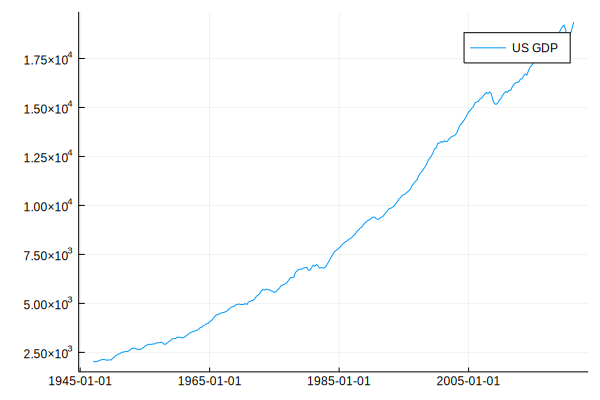

In [6]:
using Plots

# Define values and dates
series_values = df_series.value
series_dates  = df_series.date

# Plot the data
plot(series_dates,series_values,label="US GDP")

## Downloading multiple series
The above method is useful for single series, but cumbersome for multiple series. [Jens Herold](https://jens-herold1989.medium.com/economic-analysis-in-julia-ae12e8e30e4a) shows how we can better handle multiple series using a dictionary.

In [7]:
# Identifiers and other settings
series_id = ["GDPC1"; "CPIAUCSL"; "FEDFUNDS"]
startdate = "1970-01-01"
enddate   = "2021-01-01"
freq      = "q"
agg       = "avg"

# Predefine a dictionary
entryvalues = fill(Any[],size(series_id))
dict = Dict(zip(series_id, entryvalues))

# Loop over the API requests
for (iter, value) in enumerate(series_id)
Fred_Key = "$value" # get identifier
  pull_data = get_data(f,Fred_Key,frequency = freq, observation_start = startdate, observation_end = enddate, aggregation_method = agg)
if iter == 1
dict["timeline"] = pull_data.data[:,3]
  dict[Fred_Key] = pull_data.data[:,4]
else
  dict[Fred_Key] = pull_data.data[:,4]
  
  end
end

### Put the series into a table
Transform the dictionary into a data frame.

In [8]:
# Turn dictionary into Data Frame
df_data = DataFrame(dict)

,CPIAUCSL,FEDFUNDS,GDPC1,timeline
,Any,Any,Any,Any
1,38.1,8.57,4939.76,"Date(""1970-01-01"")"
2,38.633,7.89,4946.77,"Date(""1970-04-01"")"
3,39.033,6.71,4992.36,"Date(""1970-07-01"")"
4,39.6,5.57,4938.86,"Date(""1970-10-01"")"
5,39.933,3.86,5073.0,"Date(""1971-01-01"")"
6,40.3,4.57,5100.45,"Date(""1971-04-01"")"
7,40.7,5.48,5142.42,"Date(""1971-07-01"")"
8,41.0,4.75,5154.55,"Date(""1971-10-01"")"
9,41.333,3.55,5249.34,"Date(""1972-01-01"")"


### Plot the series

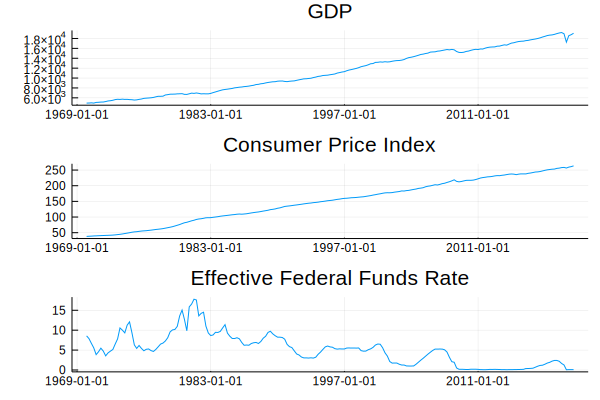

In [9]:
# Plot the data
series_dates = df_data.timeline
p1 = plot(series_dates,df_data.GDPC1,title="GDP")
p2 = plot(series_dates,df_data.CPIAUCSL,title="Consumer Price Index")
p3 = plot(series_dates,df_data.FEDFUNDS,title="Effective Federal Funds Rate")

plot(p1, p2, p3, layout = (3, 1), legend = false)


## Export Data to CSV
Finally, we can export our dataset to a CSV file using the [CSV.jl](https://csv.juliadata.org/stable/) package.

In [10]:
using CSV

file_path = pwd()
file_name = "/FRED_data.csv"
CSV.write(file_path*file_name,df_data)

"C:\\Users\\jamie\\Dropbox\\Untitled Folder/FRED_data.csv"